In [2]:
import numpy as np

from sklearn.cluster import k_means
import matplotlib.pyplot as plt

In [3]:
# cluster 1

c1 = np.random.multivariate_normal([1,1], [[1,0],[0,1]], 100)
c2 = np.random.multivariate_normal([5,5], [[1,0],[0,1]], 100)
c3 = np.random.multivariate_normal([1,4], [[1.5,0],[0,1]], 100)

In [4]:
data = np.vstack([np.vstack([c1,c2]),c3])

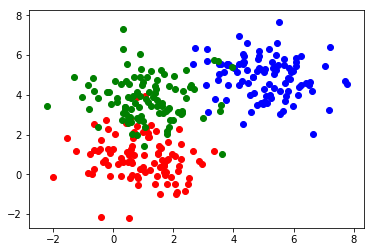

In [5]:
plt.scatter(c1[:,0],c1[:,1], color='r')
plt.scatter(c2[:,0],c2[:,1], color='b')
plt.scatter(c3[:,0],c3[:,1], color='g')

In [6]:
# randomly initialise clusters

cluster_no = 3

idxs = np.random.choice(data.shape[0], cluster_no, replace=False)

m1 = data[idxs[0],:]
m2 = data[idxs[1],:]
m3 = data[idxs[2],:]

centroids = [m1,m2,m3]

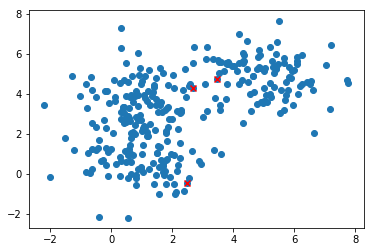

In [7]:
plt.scatter(data[:,0],data[:,1])
plt.scatter(m1[0], m1[1], marker='x', color='r')
plt.scatter(m2[0], m2[1], marker='x', color='r')
plt.scatter(m3[0], m3[1], marker='x', color='r')

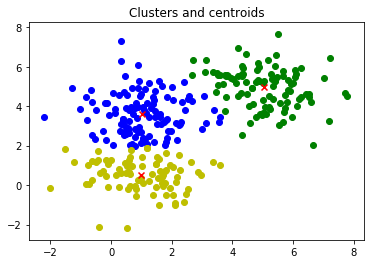

Convergence: False


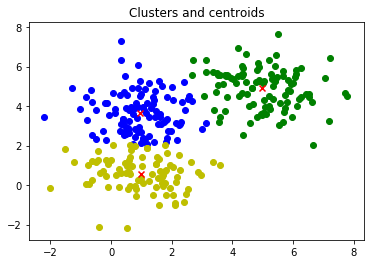

Convergence: False


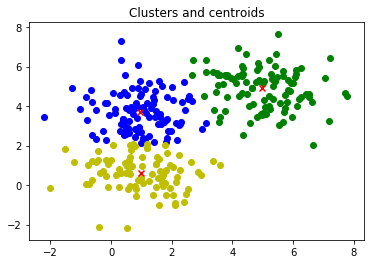

Convergence: False


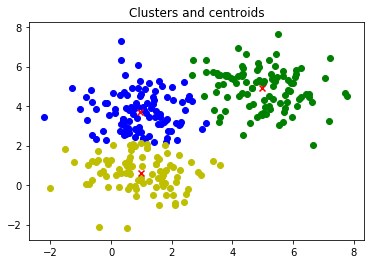

Convergence: False


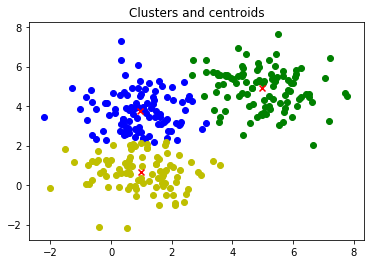

Convergence: False


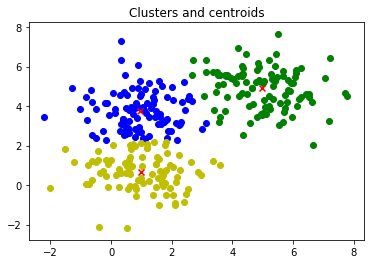

Convergence: False


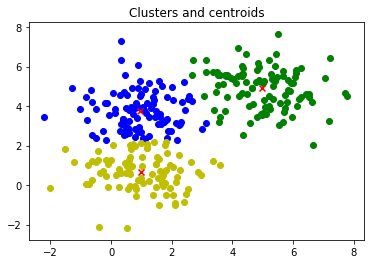

Convergence: True


In [8]:
converged = False

while converged == False:
    labels = []
    centroid1, centroid2, centroid3 = [], [], []

    for i in range(data.shape[0]):
        dists = [np.linalg.norm(data[i,:] - m) for m in centroids]
        assignment = np.argmin(dists)
        labels.append(assignment)
        if assignment == 0:
            centroid1.append(data[i,:])
        elif assignment == 1:
            centroid2.append(data[i,:])
        else:
            centroid3.append(data[i,:])

    centroid1, centroid2, centroid3 = np.stack(centroid1), np.stack(centroid2), np.stack(centroid3)

    # update centroids

    m1 = np.array([np.mean(centroid1[:,0]), np.mean(centroid1[:,1])])
    m2 = np.array([np.mean(centroid2[:,0]), np.mean(centroid2[:,1])])
    m3 = np.array([np.mean(centroid3[:,0]), np.mean(centroid3[:,1])])
    
    plt.scatter(centroid1[:,0],centroid1[:,1], color='b')
    plt.scatter(centroid2[:,0],centroid2[:,1], color='g')
    plt.scatter(centroid3[:,0],centroid3[:,1], color='y')
    plt.scatter(m1[0], m1[1], marker='x', color='r')
    plt.scatter(m2[0], m2[1], marker='x', color='r')
    plt.scatter(m3[0], m3[1], marker='x', color='r')
    
    plt.title('Clusters and centroids')
    plt.show()
    
    # check convergence
    
    if np.array_equal(np.stack([m1, m2, m3]), np.stack(centroids)):
        converged = True
    print('Convergence: ' + str(converged))
    
    #update centroids
    
    centroids = [m1, m2, m3]

## Check with sklearn implementation

In [9]:
k_means(data, 3)[0]

array([[0.99444553, 0.66132565],
       [4.97546325, 4.9166181 ],
       [0.9391374 , 3.7470385 ]])

In [10]:
centroids

[array([0.9391374, 3.7470385]),
 array([4.97546325, 4.9166181 ]),
 array([0.99444553, 0.66132565])]